In [1]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  #MacOS自带字体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
df = pd.read_excel('data/水土保持-重点工程-结果.xlsx')[['省','省份得分']]
df.head()

,省,省份得分
0,云南,90.07
1,云南,90.07
2,内蒙古,50.95
3,北京,93.29
4,北京,93.29


In [3]:
scores = Series(df['省份得分'].values,index=df['省'].values)
scores.head()

云南     90.07
云南     90.07
内蒙古    50.95
北京     93.29
北京     93.29
dtype: float64

In [4]:
colors = [(110/255,231/255,183/255), (110/255,231/255,183/255),(110/255,231/255,183/255), 'orange', 'orange', (248/255,113/255,113/255),(248/255,113/255,113/255),(248/255,113/255,113/255)]
bins = pd.cut(scores, bins=[32,42,52,62,72,82,92,102])
bins.value_counts()

(82, 92]     25
(92, 102]    15
(72, 82]     11
(62, 72]      2
(32, 42]      1
(42, 52]      1
(52, 62]      0
dtype: int64

In [5]:
data = pd.DataFrame({'score': scores, 'bin': bins, 'mid':bins.map(lambda x:int(x.mid))})
data.head()

,score,bin,mid
云南,90.07,"(82, 92]",87
云南,90.07,"(82, 92]",87
内蒙古,50.95,"(42, 52]",47
北京,93.29,"(92, 102]",97
北京,93.29,"(92, 102]",97


In [6]:
s = Series(bins.value_counts().values, index=bins.value_counts().index.map(lambda x: int(x.mid))).sort_index()
s

37     1
47     1
57     0
67     2
77    11
87    25
97    15
dtype: int64

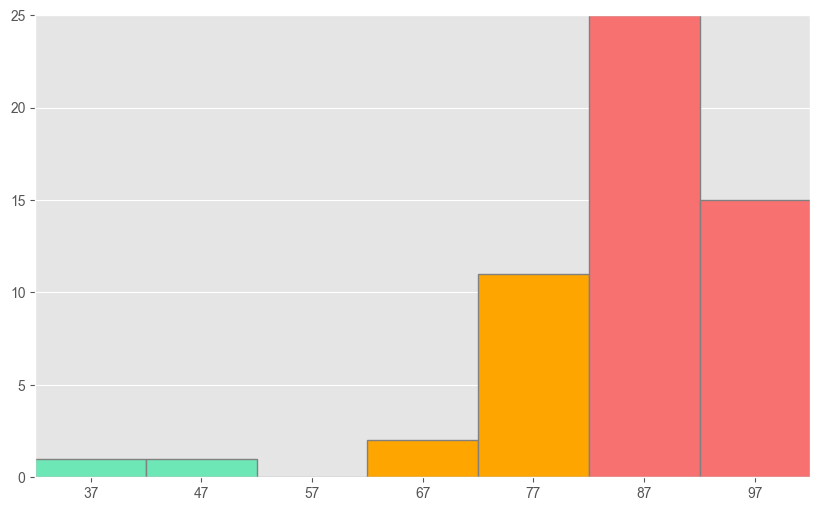

In [7]:
with plt.style.context('ggplot'):
    fig = plt.figure()
    ax = plt.axes()
    for i, value in enumerate(s.values):
        bars = ax.bar(s.index[i], value, width=10, color=colors[i])
        bars[0].set_edgecolor('gray')
        bars[0].set_linewidth(1)
    fig.figure.set_size_inches((10,6))
    ax.set_xticks(s.index)
    ax.set_xlim(32,102)
    ax.set_ylim(0,s.max())
    ax.grid(axis='x')
    plt.show()